# Visualization with python

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import time
from scipy import stats
from scipy.optimize import leastsq
import scipy.optimize as opt
from scipy.stats import norm, poisson
# from scipy.interpolate import BarycentricInterpolator, CubicSpline

import math
#import seaborn

## 1. Plot pdf of Gaussian distribution

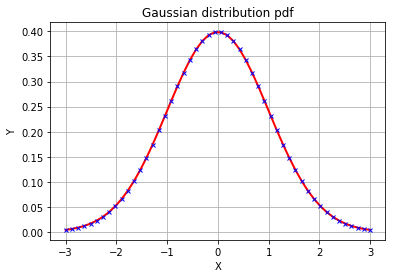

In [2]:
def plot_gaussian(mu= 0 , sigma = 1, print_data= False, num= 100):
    '''Plot pdf of Gaussian distribution'''
    # set x values
    x = np.linspace( start= mu - 3*sigma, stop = mu + 3* sigma, num= num)
    # compute y according to Gaussian pdf
    y = 1/math.sqrt(2* math.pi)/sigma * np.exp( - (x- mu)**2/ (2 * sigma**2) )
    
    if print_data == True:
        print('x = \n', x , '\n y = \n', y  )
    
    #plt.plot(x, y, 'ro-', linewidth= 2)
    plt.figure( facecolor= 'w')
    plt.plot( x, y, 'r-', x, y, 'bx', linewidth= 2, markersize= 4)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Gaussian distribution pdf', fontsize= 12)
    plt.grid(True)
    
plot_gaussian( num= 50)

## 2. Plot Loss Function
### Logistic loss(-1,1), SVM Hinge loss, 0/1 loss


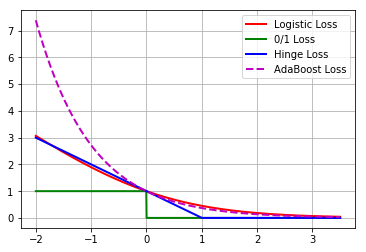

In [3]:
def plot_loss_function(start=-2, stop=3 , num= 1001):
    x = np.array(np.linspace(start= start, stop= stop, num= num, dtype=np.float))
    # Logistic loss(-1,1)
    y_logit = np.log(1 + np.exp(-x)) / math.log(2)
    # AdaBoost loss
    y_boost = np.exp(-x)
    # 0/1 loss
    y_01 = x < 0
    # hinge loss: 
    y_hinge = 1.0 - x
    y_hinge[y_hinge < 0] = 0

    plt.plot( x, y_logit, 'r-', label= 'Logistic Loss', linewidth = 2)
    plt.plot( x, y_01,    'g-', label= '0/1 Loss',      linewidth = 2)
    plt.plot( x, y_hinge, 'b-', label= 'Hinge Loss',    linewidth = 2)
    plt.plot( x, y_boost, 'm--', label= 'AdaBoost Loss', linewidth = 2)
    plt.grid()
    plt.legend(loc= 'upper right')

plot_loss_function(start=-2, stop= 3.5 )


## Plot different functions

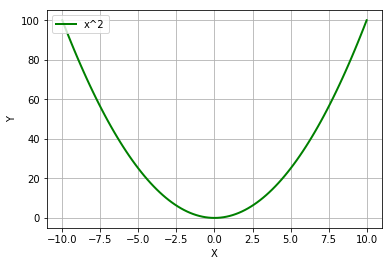

In [6]:
def plot_function(x = np.linspace(-10, 10, num= 101), fun= lambda x: x**2, label= 'x^2'):
    y = fun(x)
    plt.plot(x, y, 'g-', label= label, linewidth= 2)
    plt.grid()
    plt.legend(loc= 'upper left')
    plt.xlabel('X')
    plt.ylabel('Y')
plot_function()
    

/Users/qiaolinchen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in power
  """Entry point for launching an IPython kernel.


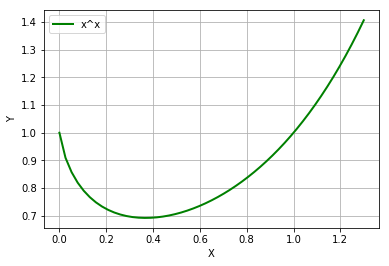

In [7]:
plot_function(x = np.linspace(-1.3, 1.3, 101), fun= lambda x: x** x, label= 'x^x')

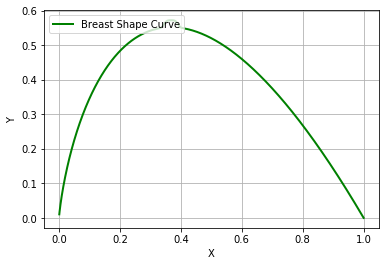

In [8]:
def breast_shape(x) :
    return (-3 * x * np.log(x) + np.exp(-(40 * (x - 1 / np.e)) ** 4) / 25) / 2
plot_function(x = np.arange(1, 0, -0.001), fun= breast_shape , label= 'Breast Shape Curve')

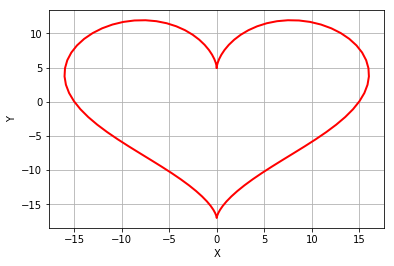

In [9]:
# Heart shape curve
t = np.linspace(0, 2*np.pi, 100)
x = 16 * np.sin(t) ** 3
y = 13 * np.cos(t) - 5 * np.cos(2*t) - 2 * np.cos(3*t) - np.cos(4*t)
plt.plot(x, y, 'r-', linewidth=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

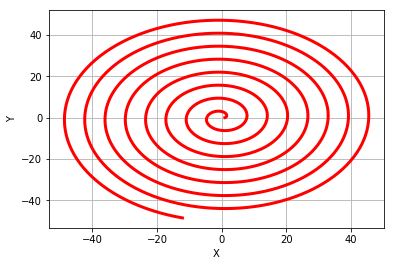

In [10]:
t= np.linspace( start= 0, stop= 50, num= 1000)
x = t* np.sin(t) + np.cos(t)
y = np.sin(t) - t* np.cos(t)
plt.plot(x, y, 'r-', linewidth= 3)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()

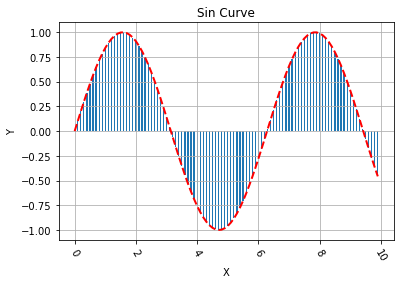

In [11]:
# Bar
x = np.arange( start= 0, stop= 10, step= 0.1)
y = np.sin(x)
plt.bar(x, y, width= 0.04, linewidth= 0.2)
plt.plot(x, y, 'r--', linewidth= 2)
plt.title('Sin Curve')
plt.xticks(rotation= -60)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()

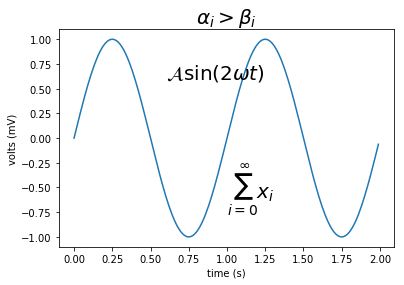

In [12]:
import numpy as np
import matplotlib.pyplot as plt
t = np.arange(0.0, 2.0, 0.01)
s = np.sin(2*np.pi*t)

plt.plot(t,s)
plt.title(r'$\alpha_i > \beta_i$', fontsize=20)
plt.text(1, -0.6, r'$\sum_{i=0}^\infty x_i$', fontsize=20)
plt.text(0.6, 0.6, r'$\mathcal{A}\mathrm{sin}(2 \omega t)$',
         fontsize=20)
plt.xlabel('time (s)')
plt.ylabel('volts (mV)')
plt.show()

# Probability Distributions
## 1. Uniform distribution

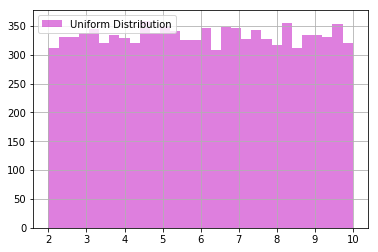

In [20]:
def plot_uniform(start=0, end= 1):
    x = start + np.random.rand(10000)*(end - start)
    plt.hist(x, bins= 30, color= 'm', alpha= 0.5, label= 'Uniform Distribution')
    #t = np.arange(len(x))
    #plt.plot(t, x, 'r-', label=u'Uniform Distribution')
    plt.legend(loc= 'upper left')
    plt.grid()

plot_uniform(start= 2, end= 10)

### Visualize Central Limit Theorem for Uniform Distribution

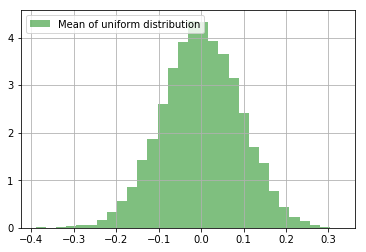

In [26]:
N = 10000
t = 1000
a = np.zeros(N)  # to storage sum of N Uniform variables
for i in range(t):
    a += np.random.uniform(-5, 5, N)
a = a/t          # mean of t = 1000 uniform distribution

plt.hist(a, bins= 30, color= 'g', alpha = 0.5, normed = True, label= 'Mean of uniform distribution')
plt.legend(loc = 'upper left')
plt.grid()

## 2. Poisson Distribution

(array([ 0.006 ,  0.0347,  0.0835,  0.14  ,  0.1749,  0.1722,  0.1456,
        0.1088,  0.0671,  0.0333,  0.0207,  0.0075,  0.0037,  0.0012,
        0.0008]), array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.]), <a list of 15 Patch objects>)
1.0


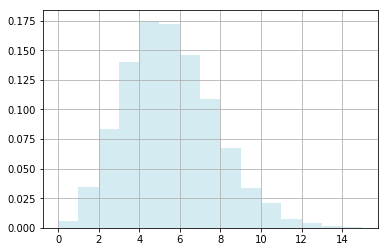

In [52]:
x = np.random.poisson(lam= 5, size= 10000)
pillar = 15
a = plt.hist(x, bins = pillar, normed = True, range= [0, pillar], color='lightblue', alpha = 0.5)
plt.grid()
print(a)
print(a[0].sum())

### Visualize Central Limit Theorem for Poission Distributions

Text(0.5,1,'Mean of N Possoin variables, lambda= 10')

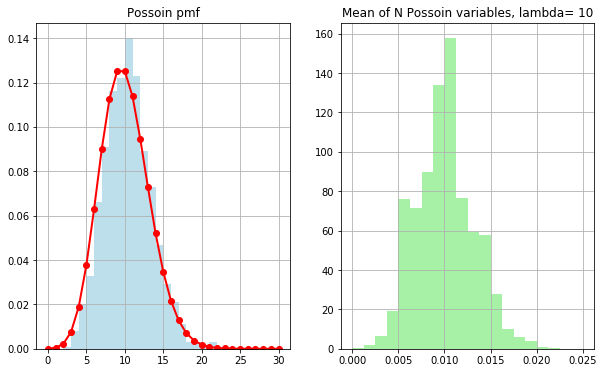

In [48]:
Lambda =10
# generate poisson random variables
poisson = stats.poisson(Lambda)
y = poisson.rvs(size= 1000)
mx = 30
r = (0, mx)
bins = r[1] - r[0]

plt.figure(figsize=(10, 6), facecolor= 'w')
plt.subplot(121)
plt.hist(y, bins= bins, range = r, color= 'lightblue', alpha= 0.8, normed= True)

t=  np.arange(0, mx + 1)
plt.plot( t, poisson.pmf(t), 'ro-', lw= 2)
plt.grid(True)
plt.title('Possoin pmf')
         

N = 1000
M = 100000

a = np.zeros(M, dtype=np.float)
p = stats.poisson(Lambda)
for i in np.arange(N):
    y = p.rvs(size=M)
    a += y
    a /= N
plt.subplot(122)
plt.hist(a, bins=20, color='lightgreen', alpha=0.8, normed=True)
plt.grid(b=True)
plt.title('Mean of N Possoin variables, lambda= 10')

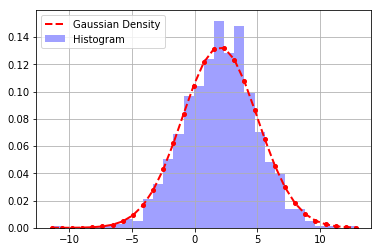

In [59]:
mu = 2
sigma = 3
data = mu + sigma * np.random.randn(1000)

# histogram of data 
h = plt.hist(data, 30, normed=1, color='#a0a0ff', label= 'Histogram')

# normal density curve
x = h[1]
y = norm.pdf(x, loc=mu, scale=sigma)
plt.plot(x, y, 'r--', x, y, 'ro', linewidth=2, markersize=4, label= 'Gaussian Density')
plt.grid()
plt.legend()


In [ ]:
    # # 6.5 插值
    # rv = poisson(5)
    # x1 = a[1]
    # y1 = rv.pmf(x1)
    # itp = BarycentricInterpolator(x1, y1)  # 重心插值
    # x2 = np.linspace(x.min(), x.max(), 50)
    # y2 = itp(x2)
    # cs = scipy.interpolate.CubicSpline(x1, y1)       # 三次样条插值
    # plt.plot(x2, cs(x2), 'm--', linewidth=5, label='CubicSpine')           # 三次样条插值
    # plt.plot(x2, y2, 'g-', linewidth=3, label='BarycentricInterpolator')   # 重心插值
    # plt.plot(x1, y1, 'r-', linewidth=1, label='Actural Value')             # 原始值
    # plt.legend(loc='upper right')
    # plt.grid()
    # plt.show()

# 3D Plots

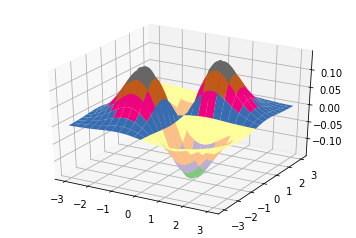

In [43]:
x, y = np.ogrid[-3:3:100j, -3:3:100j]
#u = np.linspace(start= -3, stop= 3, num= 101)
# x, y = np.meshgrid(u,u)

z = x*y*np.exp(-(x**2 + y**2)/2) / math.sqrt(2*math.pi)
# z = x*y*np.exp(-(x**2 + y**2)/2) / math.sqrt(2*math.pi)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(x, y, z, rstride=5, cstride=5, cmap=cm.coolwarm, linewidth=0.1)  #
ax.plot_surface(x, y, z, rstride=5, cstride=5, cmap=cm.Accent, linewidth=0.5)
plt.show()
    # # cmaps = [('Perceptually Uniform Sequential',
    # #           ['viridis', 'inferno', 'plasma', 'magma']),
    # #          ('Sequential', ['Blues', 'BuGn', 'BuPu',
    # #                          'GnBu', 'Greens', 'Greys', 'Oranges', 'OrRd',
    # #                          'PuBu', 'PuBuGn', 'PuRd', 'Purples', 'RdPu',
    # #                          'Reds', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd']),
    # #          ('Sequential (2)', ['afmhot', 'autumn', 'bone', 'cool',
    # #                              'copper', 'gist_heat', 'gray', 'hot',
    # #                              'pink', 'spring', 'summer', 'winter']),
    # #          ('Diverging', ['BrBG', 'bwr', 'coolwarm', 'PiYG', 'PRGn', 'PuOr',
    # #                         'RdBu', 'RdGy', 'RdYlBu', 'RdYlGn', 'Spectral',
    # #                         'seismic']),
    # #          ('Qualitative', ['Accent', 'Dark2', 'Paired', 'Pastel1',
    # #                           'Pastel2', 'Set1', 'Set2', 'Set3']),
    # #          ('Miscellaneous', ['gist_earth', 'terrain', 'ocean', 'gist_stern',
    # #                             'brg', 'CMRmap', 'cubehelix',
    # #                             'gnuplot', 'gnuplot2', 'gist_ncar',
    # #                             'nipy_spectral', 'jet', 'rainbow',
    # #                             'gist_rainbow', 'hsv', 'flag', 'prism'])]

 